In [ ]:
!pip install -U datasets huggingface_hub fsspec pandas scikit-learn matplotlib seaborn numpy



  Using cached fsspec-2025.7.0-py3-none-any.whl.metadata (12 kB)


In [ ]:
# ✅ STEP 2: Import Libraries
from datasets import load_dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# ✅ STEP 3: Load CIC-IDS2017 (Binary) Dataset
from datasets import load_dataset
dataset = load_dataset("sonnh-tech1/cic-ids-2017", "binary")
df = dataset["train"].to_pandas()
print(df)

         DestinationPort  FlowDuration  TotalFwdPackets  TotalBackwardPackets  \
0                  54865             3                2                     0   
1                  55054           109                1                     1   
2                  55055            52                1                     1   
3                  46236            34                1                     1   
4                  54863             3                2                     0   
...                  ...           ...              ...                   ...   
2522357               53         32215                4                     2   
2522358               53           324                2                     2   
2522359            58030            82                2                     1   
2522360               53       1048635                6                     2   
2522361               53         94939                4                     2   

         TotalLengthofFwdPa

In [ ]:
# ✅ STEP 4: Preprocess Data
#df.dropna(inplace=True)  # Drop missing rows
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])  # Benign=0, Threat=1
X = df.drop('Label', axis=1)
y = df['Label']
print(X,y)
X_numeric = X.select_dtypes(include=['int64', 'float64'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)
print(X_scaled)
print(y)

         DestinationPort  FlowDuration  TotalFwdPackets  TotalBackwardPackets  \
0                  54865             3                2                     0   
1                  55054           109                1                     1   
2                  55055            52                1                     1   
3                  46236            34                1                     1   
4                  54863             3                2                     0   
...                  ...           ...              ...                   ...   
2522357               53         32215                4                     2   
2522358               53           324                2                     2   
2522359            58030            82                2                     1   
2522360               53       1048635                6                     2   
2522361               53         94939                4                     2   

         TotalLengthofFwdPa

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Split data (same as before)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=10, learning_rate=0.05,subsample=0.8, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.05
,n_estimators,10
,subsample,0.8
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [ ]:
# Predict
y_pred_gb = gb_model.predict(X_test)

# Accuracy
print("✅ Accuracy:", accuracy_score(y_test, y_pred_gb))

# Classification report
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred_gb))

# Confusion Matrix
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

✅ Accuracy: 0.9783562769836225

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    628642
           1       0.85      0.36      0.51       575
           2       1.00      0.95      0.97     38338
           3       0.99      0.57      0.73      3122
           4       1.00      0.80      0.89     52061
           5       0.99      0.79      0.88      1576
           6       1.00      0.82      0.90      1636
           7       0.99      1.00      0.99      1758
           8       1.00      0.60      0.75         5
           9       0.11      0.25      0.15         8
          10       0.99      0.99      0.99     27368
          11       1.00      0.99      0.99       966
          12       0.47      0.06      0.10       448
          13       0.08      0.20      0.12         5
          14       0.25      0.88      0.39       201

    accuracy                           0.98    756709
   macro avg       0.7

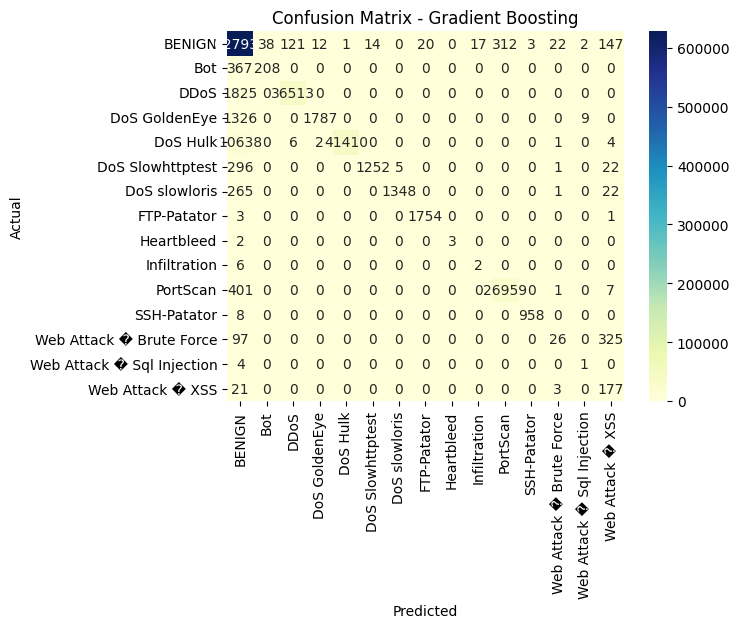

In [ ]:
conf_mat_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(conf_mat_gb, annot=True, fmt='d', cmap='YlGnBu', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()



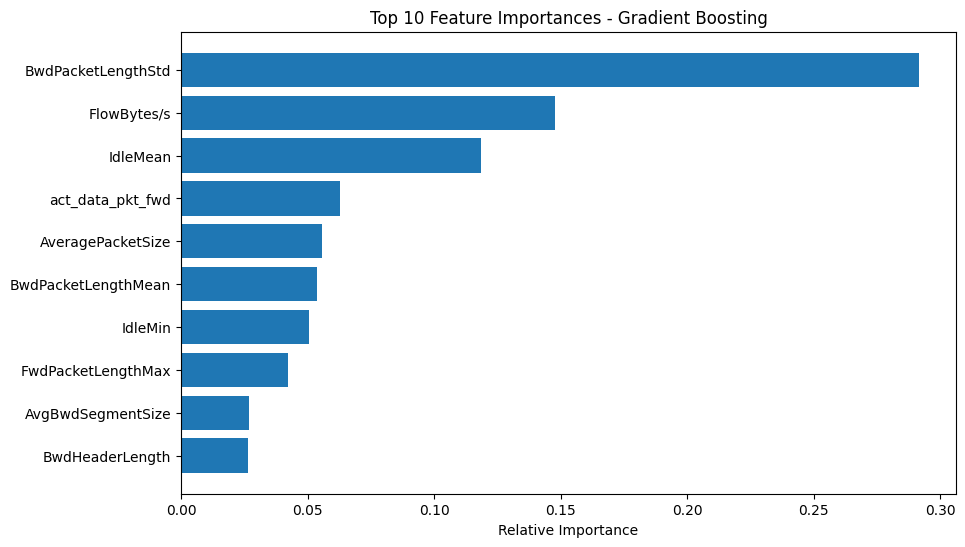

In [ ]:
importances_gb = gb_model.feature_importances_
indices_gb = np.argsort(importances_gb)[-10:]

plt.figure(figsize=(10,6))
plt.title("Top 10 Feature Importances - Gradient Boosting")
plt.barh(range(len(indices_gb)), importances_gb[indices_gb], align='center')
plt.yticks(range(len(indices_gb)), [X.columns[i] for i in indices_gb])
plt.xlabel('Relative Importance')
plt.show()
